In [11]:
##  AND 함수 
import numpy as np

def AND(x1,x2):
    b=-0.6
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    hf=np.sum(w*x)+b
    
    if hf<=0:
        return 0
    else:
        return 1

for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(AND(data[0],data[1]))

0
0
0
1


In [15]:
##  NAND 함수
import numpy as np

def NAND(x1,x2):
    b=0.6
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5])
    hf=np.sum(w*x)+b
    
    if hf<=0:
        return 0
    else:
        return 1

for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(NAND(data[0],data[1]))

1
1
1
0


In [16]:
##  OR 함수 
import numpy as np

def OR(x1,x2):
    b=-0.1
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    hf=np.sum(w*x)+b
    
    if hf<=0:
        return 0
    else:
        return 1

for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(OR(data[0],data[1]))

0
1
1
1


In [17]:
##  XOR 함수 (다층 퍼셉트론)
import numpy as np

def XOR(x1,x2):
    r1=NAND(x1,x2)
    r2=OR(x1,x2)
    y=AND(r1,r2)
    return y

for data in [(0,0),(0,1),(1,0),(1,1)]:
    print(XOR(data[0],data[1]))

0
1
1
0


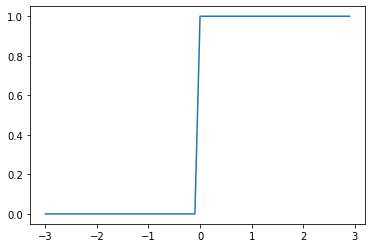

In [20]:
## step function 함수

import matplotlib.pyplot as plt

def step(x):
    return np.array(x>0, dtype=np.int)
    
x=np.arange(-3,3,0.1)
y=step(x)
plt.plot(x,y)
plt.ylim=(-0.1,1.1)
plt.show()

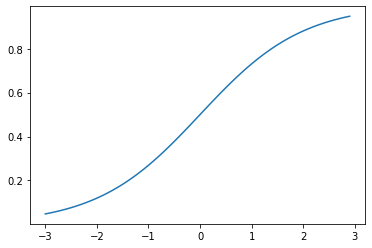

In [21]:
## sigmoid 함수

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))
    
x=np.arange(-3,3,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim=(-0.1,1.1)
plt.show()

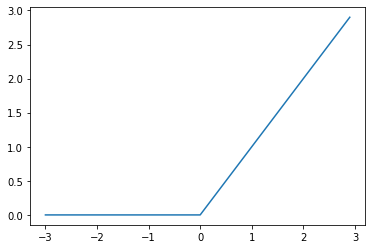

In [23]:
## reLU 함수

import matplotlib.pyplot as plt
import numpy as np

def relu(x):
    return np.maximum(0,x)
    
x=np.arange(-3,3,0.1)
y=relu(x)
plt.plot(x,y)
plt.ylim=(-0.1,1.1)
plt.show()

In [143]:
import numpy as  np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

# 표준화
from sklearn import preprocessing

# MLP model
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

In [66]:
path=r'C:\\Users\\student\\Desktop\\공부\\멀캠TIL\\dataset\\python\\data'

train=pd.read_csv(path+'\\titanic_train.csv')
test=pd.read_csv(path+'\\titanic_test.csv')

In [67]:
# train set + test set
full=pd.concat([train, test], ignore_index=True)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [34]:
train.info()
test.info()
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [68]:
# 기존 data 없애기
train=pd.DataFrame()
test=pd.DataFrame()

In [70]:
def extract_df():
    train=full.loc[full['Survived'].notnull()]
    test=full.loc[full['Survived'].isnull()]
    return train, test

train, test=extract_df()

In [71]:
# Name col에서 호칭을 series로 추출
title_sr=full['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 호칭 x Sex
full['Title']=title_sr
pd.crosstab(full['Title'], full['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [82]:
title_sr

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [72]:
title_sr.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Lady          1
Countess      1
Dona          1
Jonkheer      1
Don           1
Sir           1
Capt          1
Mme           1
Name: Name, dtype: int64

In [73]:
## 호칭 단순화
title_list=set(title_sr)
map_title_dict={'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Miss'}

working_dict={}
for key in ['Lady','Countess','Capt','Col','Don','Major','Rev','Sir','Jonkheer','Dona']:
    working_dict[key]='Rare'

In [74]:
# 호칭 mapping dict 합치기
map_title_dict.update(working_dict)
map_title_dict

{'Mlle': 'Miss',
 'Ms': 'Miss',
 'Mme': 'Miss',
 'Lady': 'Rare',
 'Countess': 'Rare',
 'Capt': 'Rare',
 'Col': 'Rare',
 'Don': 'Rare',
 'Major': 'Rare',
 'Rev': 'Rare',
 'Sir': 'Rare',
 'Jonkheer': 'Rare',
 'Dona': 'Rare'}

In [75]:
# 호칭 치환
full['Title']=full['Title'].replace(map_title_dict)

In [76]:
full['Title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Rare
1306        Mr
1307        Mr
1308    Master
Name: Title, Length: 1309, dtype: object

In [77]:
set(list(full['Title']))

{'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rare'}

In [78]:
## 필요없는 column 제거
subcol=test['PassengerId']
full.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

In [ ]:
#train, test=extract_df()

In [85]:
# Pclass별 생존자 평균
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean() 

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [86]:
#train.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [92]:
# column별 data 종류의 갯수
feature_list=list(full)

for f in feature_list:
    print(f+' '+str(len(full[f].value_counts())))

Age 98
Embarked 3
Fare 281
Parch 8
Pclass 3
Sex 2
SibSp 7
Survived 2
Title 6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C827CFB9C8>,
      dtype=object)

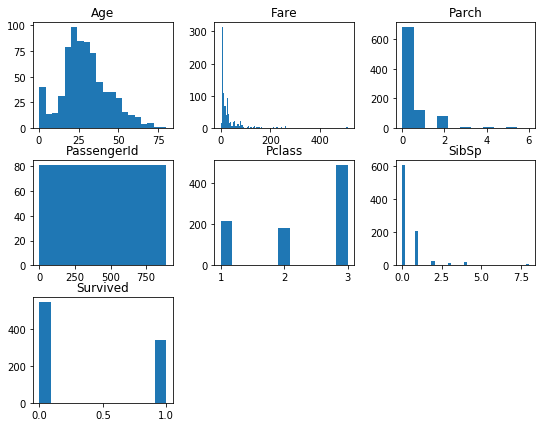

In [93]:
train.hist(figsize=(9,7),grid=False, bins='auto')

In [99]:
# 결측값 갯수 확인
train.isnull().sum()
test.isnull().sum()
full['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [100]:
# 결측값 처리
full['Embarked'].fillna('S', inplace=True)
full['Fare'].fillna(test['Fare'].median(), inplace=True)

In [109]:
train, test=extract_df()

In [103]:
## 원핫인코딩
full['Sex']=full['Sex'].map({'female':0, 'male':1})

In [104]:
def onehot(df, feature_list):
    df=pd.get_dummies(df, columns=feature_list)
    return df
    
onehot_list=['Title','Pclass','Embarked']
full=onehot(full, onehot_list)

In [105]:
full

,Age,Fare,Parch,Sex,SibSp,Survived,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,1,0.0,0,0,0,1,0,0,0,0,1,0,0,1
1,38.0,71.2833,0,0,1,1.0,0,0,0,0,1,0,1,0,0,1,0,0
2,26.0,7.9250,0,0,0,1.0,0,0,1,0,0,0,0,0,1,0,0,1
3,35.0,53.1000,0,0,1,1.0,0,0,0,0,1,0,1,0,0,0,0,1
4,35.0,8.0500,0,1,0,0.0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,8.0500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1
1305,39.0,108.9000,0,0,0,NaN,0,0,0,0,0,1,1,0,0,1,0,0
1306,38.5,7.2500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1
1307,NaN,8.0500,0,1,0,NaN,0,0,0,1,0,0,0,0,1,0,0,1


In [ ]:
### MLP classifier 기반 나이 예측 및 나이 결측 값 대체

In [123]:
train, test=extract_df()
train_age=full[[x for x in list(train) if not x in ['Survived']]]  

xpred_age=train_age.loc[train_age['Age'].isnull()]
xtrain_age=train_age.loc[train_age['Age'].notnull()]

In [124]:
ytrain_age=xtrain_age['Age']
xtrain_age.drop('Age', axis=1, inplace=True)
xpred_age.drop('Age', axis=1, inplace=True)

C:\Users\student\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [125]:
## 표준화
scaler=preprocessing.StandardScaler().fit(xtrain_age)
xtrain_age=scaler.transform(xtrain_age)
xpred_age=scaler.transform(xpred_age)

In [126]:
# age column에서 결측값이 있는 index 추출 (=예측해야 할 )
age_none_list=full[full['Age'].isnull()].index.tolist()

In [128]:
mlr=MLPRegressor(solver='lbfgs',alpha=1e-5, hidden_layer_sizes=(50,50))
mlr.fit(xtrain_age, ytrain_age)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [129]:
mlr.score(xtrain_age, ytrain_age)

0.6103150891181028

In [130]:
# 실제 나이와 예측한 나이 비교
for a,b in zip(np.array(ytrain_age),mlr.predict(xtrain_age)):
    print(a," ", b)

22.0   25.108074552548672
38.0   44.33613143335651
26.0   23.293315517141366
35.0   32.77630974311909
35.0   28.369185027670177
54.0   38.95208639141259
2.0   2.999315501006255
27.0   29.171149158476382
14.0   21.41525004313211
4.0   2.084612466195816
58.0   32.32690881395574
20.0   28.369185027670177
39.0   37.75130602773189
14.0   23.298242780897986
55.0   36.3079094857297
2.0   6.343798196947451
31.0   32.11590882284695
35.0   33.166602745324965
34.0   32.22072297335719
15.0   22.90569670162291
28.0   44.745352903908596
8.0   4.1768203797631465
38.0   37.91573623375099
19.0   16.702297212136326
40.0   49.910489606033984
66.0   32.01536696845033
28.0   40.85492712240763
42.0   35.9473380619893
21.0   28.369185027670177
18.0   20.90809777515262
14.0   14.031983753451135
40.0   31.4138398705565
27.0   31.953665986703555
3.0   3.0941885605542145
19.0   22.911583456203903
18.0   32.09943799698676
7.0   3.9651063399608817
21.0   28.382310887970043
49.0   43.677673029885895
29.0   33.58481

18.0   18.175574566186395
49.0   49.29889578672724
0.17   2.123950612867256
50.0   45.56402659853714
59.0   57.98686692642612
30.0   31.914141206059654
14.5   16.0273739791994
24.0   24.84498577977649
31.0   37.263885903551596
27.0   28.33702666993552
25.0   45.45140267810518
22.0   22.699186585841197
45.0   44.21451548755229
29.0   28.72967098127986
21.0   30.039262614970102
31.0   38.59538130622971
49.0   39.73564515081462
44.0   32.22072297335719
54.0   49.07800064141184
45.0   41.61691710873223
22.0   18.397923340517977
21.0   32.09750937041307
55.0   39.602489507318055
5.0   6.713476979588002
26.0   32.64616063310417
19.0   31.95943597717516
24.0   23.92715956790704
24.0   28.383623474000032
57.0   32.22072297335719
21.0   32.638159036773565
6.0   2.999315501006255
23.0   26.078035191867258
51.0   60.747001282350354
13.0   7.796822094515101
47.0   32.01536696845033
29.0   22.696440558588918
18.0   33.13629205431688
24.0   32.607193106701565
48.0   44.58491224217944
22.0   28.38362

In [132]:
# 예측한 값을 데이터에 저장
full['Age'][age_none_list]=mlr.predict(xpred_age).tolist()

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Age             1309 non-null float64
Fare            1309 non-null float64
Parch           1309 non-null int64
Sex             1309 non-null int64
SibSp           1309 non-null int64
Survived        891 non-null float64
Title_Dr        1309 non-null uint8
Title_Master    1309 non-null uint8
Title_Miss      1309 non-null uint8
Title_Mr        1309 non-null uint8
Title_Mrs       1309 non-null uint8
Title_Rare      1309 non-null uint8
Pclass_1        1309 non-null uint8
Pclass_2        1309 non-null uint8
Pclass_3        1309 non-null uint8
Embarked_C      1309 non-null uint8
Embarked_Q      1309 non-null uint8
Embarked_S      1309 non-null uint8
dtypes: float64(3), int64(3), uint8(12)
memory usage: 76.8 KB


In [137]:
##  MLP classifier 기반 생존 여부 예측
xtrain=full[full['Survived'].notnull()]
ytrain=full['Survived'][full['Survived'].notnull()]

In [138]:
xpred=full[full['Survived'].isnull()]

In [139]:
xtrain.drop('Survived',axis=1, inplace=True)
xpred.drop('Survived',axis=1, inplace=True)

C:\Users\student\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [141]:
scaler=preprocessing.StandardScaler().fit(xtrain)
xtrain=scaler.transform(xtrain)
xpred=scaler.transform(xpred)

In [148]:
# model 생성 및 실행
mlc=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,50))
mlc.fit(xtrain,ytrain)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [149]:
mlc.predict(xtrain)

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [150]:
submission=mlc.predict(xpred).astype(int)

In [151]:
pd.DataFrame({'PassengerId':subcol, "Survived":submission}).to_csv('titanic_sub.csv', index=False)

In [152]:
pd.DataFrame({'PassengerId':subcol, "Survived":submission})

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,0
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0
